In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df_m = pd.read_csv(r"C:\Users\pauli\Downloads\MarijampolesLigonine.csv", low_memory=False)
df_k = pd.read_csv(r"C:\Users\pauli\Downloads\KupiskioLigonine.csv", low_memory=False)
df_v = pd.read_csv(r"C:\Users\pauli\Downloads\VilkaviskioLigonine.csv", low_memory=False)


In [32]:
df_m.drop(columns=['_type', '_id', '_revision', '_page.next', 'paciento_id', 'vda_prime_key'], inplace= True)
df_k.drop(columns=['_type', '_id', '_revision', '_page.next', 'paciento_id', 'vda_prime_key'], inplace= True)
df_v.drop(columns=['_type', '_id', '_revision', '_page.next', 'paciento_id', 'vda_prime_key'], inplace= True)

In [33]:
df = pd.concat([df_m, df_k, df_v])

In [34]:
df['paciento_gimimo_metai'] = pd.to_datetime(df['paciento_gimimo_metai'], format='%Y-%m-%d')
df['tyrimo_data'] = pd.to_datetime(df['tyrimo_data'], format='%Y-%m-%d')
df['paciento_amzius'] = df['tyrimo_data'].dt.year - df['paciento_gimimo_metai'].dt.year
df['amziaus_grupe'] = df['paciento_amzius'].apply(lambda x: '0 - 19' if x < 20 else '20 - 39' if x < 40 else '40 - 59' if x < 60 else '60 - 79' if x < 80 else '80 ir daugiau')
df['paciento_diagnozes_tlk_10_am_kodas'] = df['paciento_diagnozes_tlk_10_am_kodas'].apply(lambda x: str(x)[0] if x!=None else None)

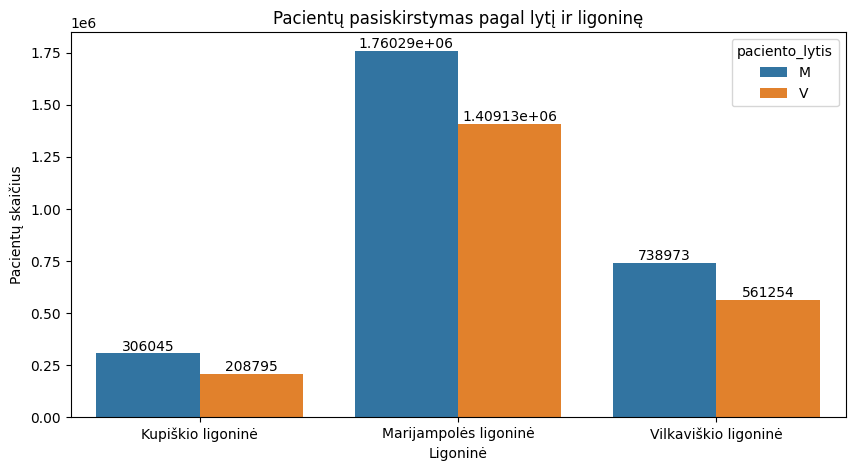

In [36]:
df_laik = df.groupby(['istaigos_pav', 'paciento_lytis']).count().reset_index()
df_laik = df_laik[df_laik['paciento_lytis'] != 'N']
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='istaigos_pav', y='tyrimo_grupe', data=df_laik, ax=ax, hue='paciento_lytis')
ax.set_title('Pacientų pasiskirstymas pagal lytį ir ligoninę')
ax.set_xlabel('Ligoninė')
ax.set_ylabel('Pacientų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

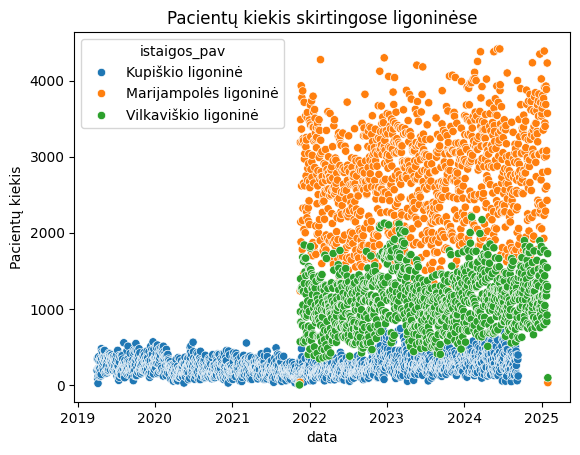

In [39]:
df_taskai = df.groupby(['istaigos_pav', 'tyrimo_data'])['paciento_lytis'].count().reset_index(name='kiekis')
fig, ax = plt.subplots()
sns.scatterplot(data=df_taskai, y='kiekis', x='tyrimo_data', hue='istaigos_pav')
ax.set_ylabel('Pacientų kiekis')
ax.set_xlabel('data')
ax.set_title('Pacientų kiekis skirtingose ligoninėse')

# for container in ax.containers:
#     ax.bar_label(container)
# plt.legend()
plt.show()

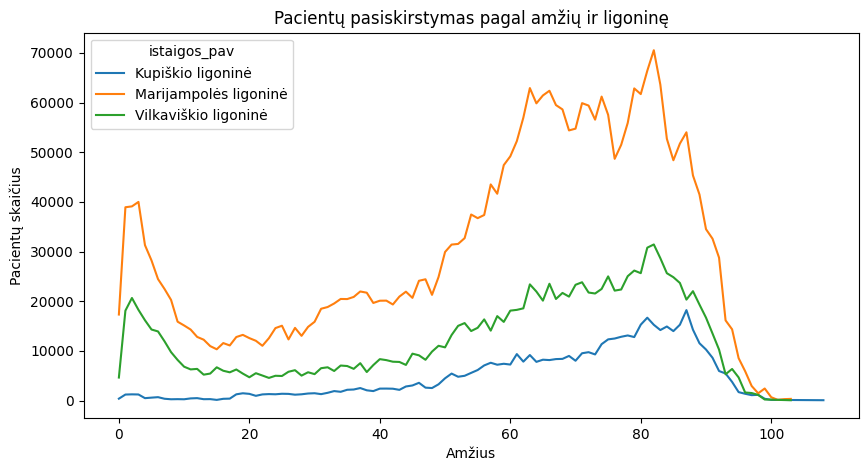

In [26]:
df_laik = df.groupby(['istaigos_pav', 'paciento_amzius']).count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(x='paciento_amzius', y='paciento_lytis', data=df_laik, ax=ax, hue='istaigos_pav')
ax.set_title('Pacientų pasiskirstymas pagal amžių ir ligoninę')
ax.set_xlabel('Amžius')
ax.set_ylabel('Pacientų skaičius')
plt.show()

C:\Users\pauli\AppData\Local\Temp\ipykernel_22240\1383512457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_laik['crb_rezultatas'] = df_laik['analites_rezultatas'] > df_laik['analites_norma_iki']


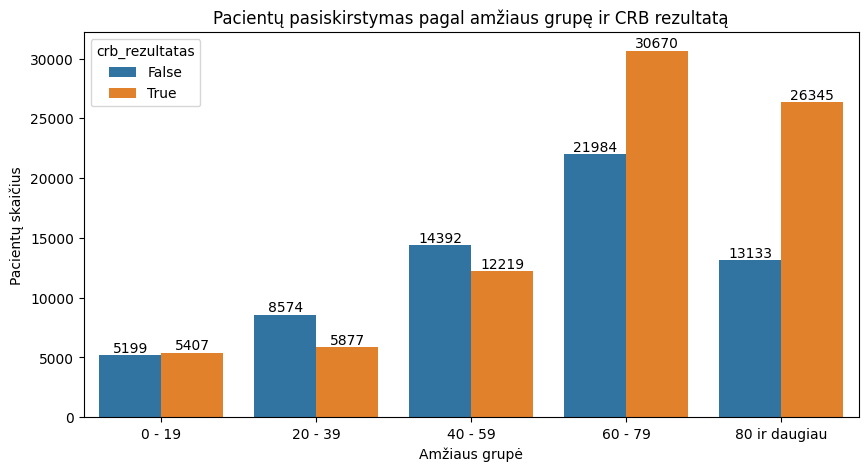

In [ ]:
df_laik = df[df['tyrimo_analite'] == 'C reaktyvinis baltymas (CRB)']
df_laik['crb_rezultatas'] = df_laik['analites_rezultatas'] > df_laik['analites_norma_iki'] 
df_laik = df_laik.groupby(['amziaus_grupe', 'crb_rezultatas']).count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='amziaus_grupe', y='tyrimo_grupe', data=df_laik, ax=ax, hue='crb_rezultatas')
ax.set_title('Pacientų pasiskirstymas pagal amžiaus grupę ir CRB rezultatą')
ax.set_xlabel('Amžiaus grupė')
ax.set_ylabel('Pacientų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()